<a href="https://colab.research.google.com/github/davismaulana/PCVK_Genap_2024/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Buat Gamma Correction sesuai dengan petunjuk berikut Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.


 Gamma Correction pada citra 
-----------------------------------
Masukkan nilai gamma: 3


Text(0.5, 1.0, 'Citra Correction')

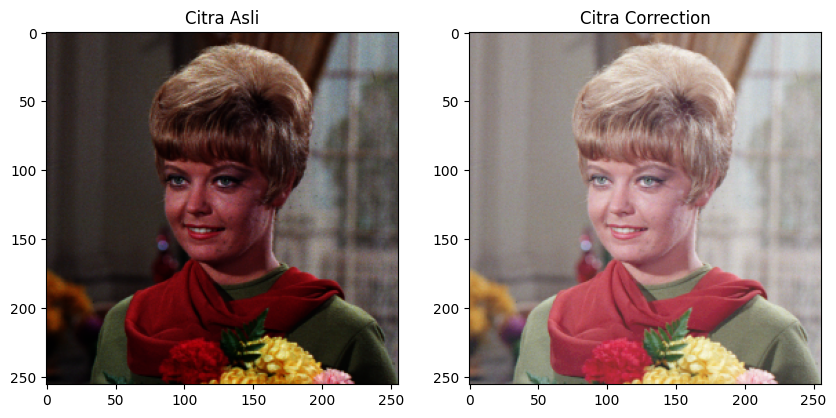

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
img = cv.imread('/content/drive/MyDrive/Images/female.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

print(' Gamma Correction pada citra ')
print('-----------------------------------')
try:
    gamma = int(input('Masukkan nilai gamma: '))
except ValueError:
    print('Error,  not a number')

def gamma_correction(image, gamma):
    image = 255 * (image / 255) ** (1 / gamma)
    return np.clip(image, 0, 255).astype(np.uint8)

img_gamma = gamma_correction(img, gamma)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img)
ax[0].set_title('Citra Asli')

ax[1].imshow(img_gamma)
ax[1].set_title('Citra Correction')

2. Buat Simulasi Image Depth

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (0000000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.

Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra, silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh pada Gambar.

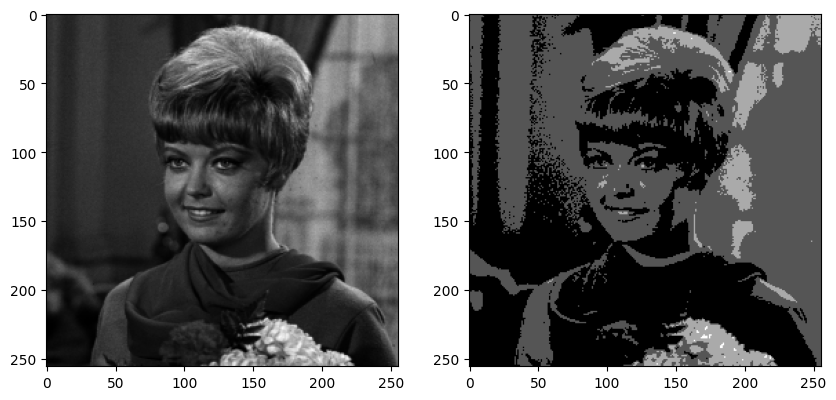

In [5]:
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)
original = cv.imread('/content/drive/MyDrive/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

def bit_depth_reduction(image, level):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            depth_image[i, j] = level * round(image[i, j] / level)
    return depth_image

depth_image = bit_depth_reduction(original, level)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(original, cmap='gray')

ax[1].imshow(depth_image, cmap='gray')

plt.show()

3. Buat modul Average Denoising

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob).

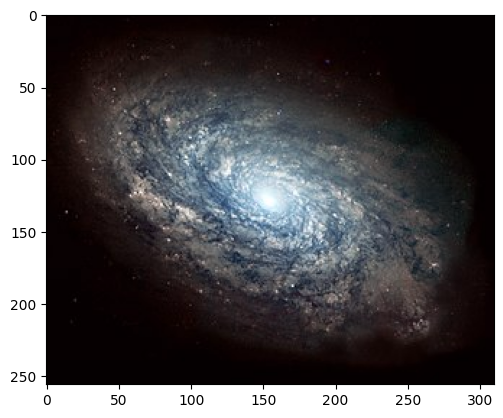

In [6]:
import glob

cv_img = []

for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

galaxy_ori = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg', cv.COLOR_BGR2RGB)
plt.imshow(galaxy_ori)

def pnsr(original, noise):
    mse = np.mean((original - noise) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def average_denoising(images, jumlah_citra):
    sum_image = np.zeros(images[0].shape, np.float64)
    for i in range(jumlah_citra):
        sum_image = sum_image + images[i]
    average_image = sum_image / jumlah_citra
    return np.clip(average_image, 0, 255).astype(np.uint8)

average_5 = average_denoising(cv_img, 5)
average_10 = average_denoising(cv_img, 10)
average_20 = average_denoising(cv_img, 20)
average_40 = average_denoising(cv_img, 40)
average_80 = average_denoising(cv_img, 80)
average_100 = average_denoising(cv_img, 100)

psnr_5 = pnsr(galaxy_ori, average_5)
psnr_10 = pnsr(galaxy_ori, average_10)
psnr_20 = pnsr(galaxy_ori, average_20)
psnr_40 = pnsr(galaxy_ori, average_40)
psnr_80 = pnsr(galaxy_ori, average_80)
psnr_100 = pnsr(galaxy_ori, average_100)

PSNR Average 5 Image:  27.53913189244123
PSNR Average 10 Image:  27.556443657166447
PSNR Average 20 Image:  27.5188002701703
PSNR Average 40 Image:  27.457069133128282
PSNR Average 80 Image:  27.399852250338785
PSNR Average 100 Image:  27.370931279516654


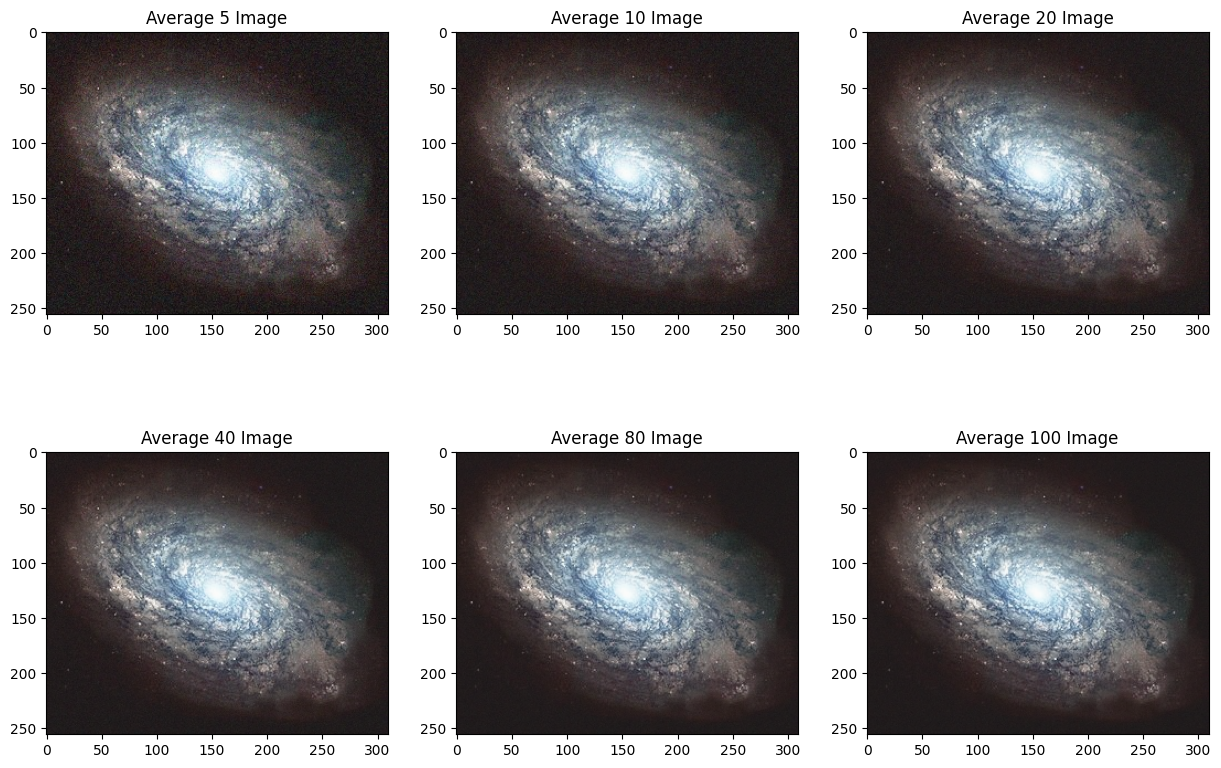

In [7]:
print('PSNR Average 5 Image: ', psnr_5)
print('PSNR Average 10 Image: ', psnr_10)
print('PSNR Average 20 Image: ', psnr_20)
print('PSNR Average 40 Image: ', psnr_40)
print('PSNR Average 80 Image: ', psnr_80)
print('PSNR Average 100 Image: ', psnr_100)

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].imshow(average_5)
ax[0, 0].set_title('Average 5 Image')

ax[0, 1].imshow(average_10)
ax[0, 1].set_title('Average 10 Image')

ax[0, 2].imshow(average_20)
ax[0, 2].set_title('Average 20 Image')

ax[1, 0].imshow(average_40)
ax[1, 0].set_title('Average 40 Image')

ax[1, 1].imshow(average_80)
ax[1, 1].set_title('Average 80 Image')

ax[1, 2].imshow(average_100)
ax[1, 2].set_title('Average 100 Image')

plt.show()

KESIMPULAN :

Metode average denoising efektif dalam mengurangi noise pada gambar, terutama ketika jumlah gambar yang di-average cukup banyak. Namun, setelah jumlah gambar tertentu, peningkatan kualitas gambar menjadi semakin kecil, menunjukkan adanya diminishing returns. Oleh karena itu, penting untuk menemukan keseimbangan antara jumlah gambar yang di-average dan peningkatan kualitas yang diinginkan.